In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score

In [8]:
# r2 index order [order,input,component,stat]
# Order =   C4, C8
# input = 3x3, 5x5
# component = tau11,tau12,...tau33
# stat = mean, std. dev.

r2=np.array([
    #C4
    [
        #3x3
        [[0.9675189634088672 , 0.0006760344251361841],
        [0.7847936265861674 , 0.002189522185347632],
        [0.7659986197619928 , 0.003671091043143276],
        [0.8049517830655372 , 0.004348441883946166],
        [0.6848217207440672 , 0.0024984246562171223],
        [0.5124965576562747 , 0.0173732246351104]],
        #5x5
        [[0.9647991723638132 , 0.003175203771836405],
        [0.7745673561759279 , 0.0036479661977395672],
        [0.7681688562559312 , 0.0017690299115084075],
        [0.7877745338196586 , 0.009474856271591902],
        [0.6956403575387532 , 0.0006068905766222715],
        [0.5139619347784252 , 0.009886320000255727]]
    ],
     #C8
    [
        #3x3
        [[ 0.9398979456620369 , 0.00325057603243717],
        [0.2909087946761424 , 0.025511973328460617],
        [0.7637906764115263 , 0.00250507439281529],
        [0.45575885633922686 , 0.033699449362875195],
        [0.6793882815882644 , 0.0018491133174560945],
        [0.48722163879414027 , 0.017604104697654954]],
        #5x5
        [[ 0.9486700492580379 , 0.0003961377504182875],
        [0.30572467218013283 , 0.020571147264766686],
        [0.7683439057205369 , 0.0030723196281357583],
        [0.5378689816869852 , 0.007738091052409296],
        [0.6919809020923409 , 0.003508831828406401],
        [0.5410934797078897 , 0.012900067371810731]]
    ]
])

In [9]:
norder = r2.shape[0]
ninput = r2.shape[1]
ncomponent=r2.shape[2]

r2.shape

(2, 2, 6, 2)

[ 0  5 10 15 20 25]


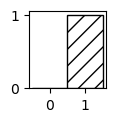

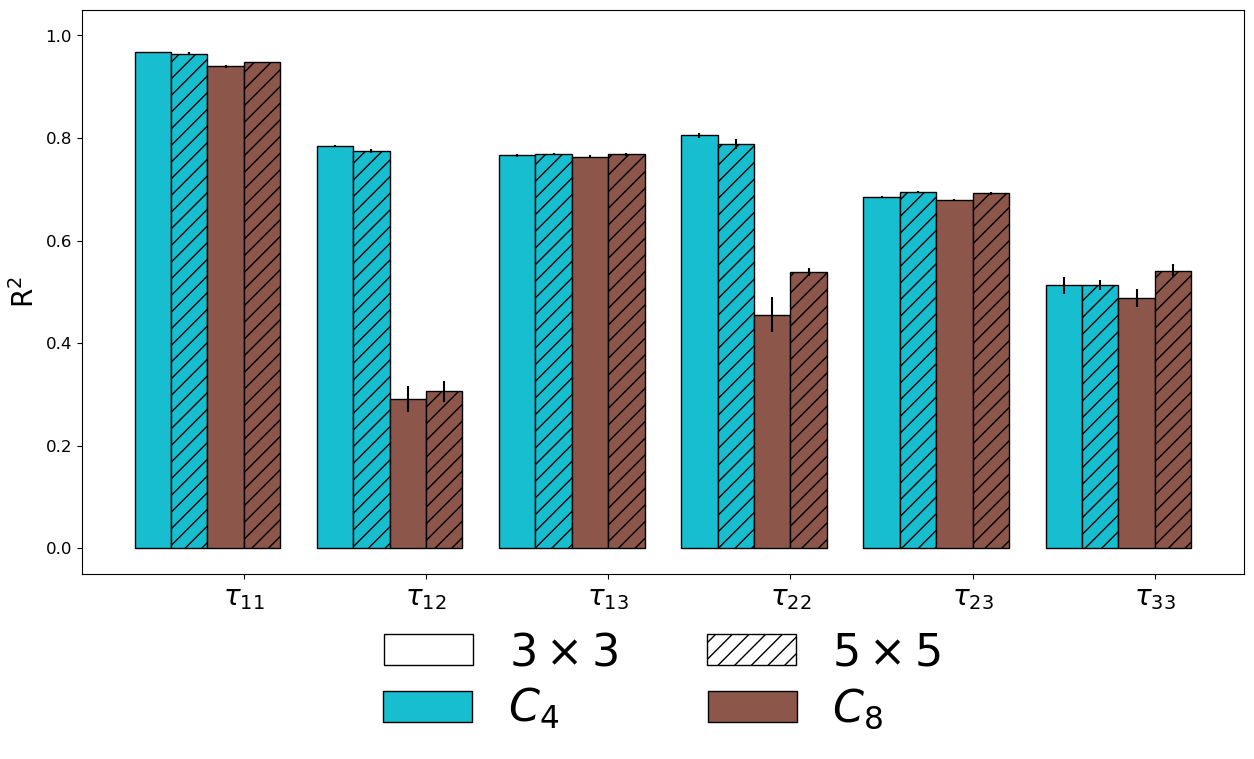

In [29]:
fs=20
ls=12

width = 1  # the width of the bars
multiplier = 0
order_text=[r'$C_4$',r'$C_8$']
component_text = [r'$\tau_{11}$', r'$\tau_{12}$', r'$\tau_{13}$', r'$\tau_{22}$', r'$\tau_{23}$', r'$\tau_{33}$']
input_text = [r'$3 \times 3$',r'$5 \times 5$']
hatches = [None,'//']
figdummy, axdummy = plt.subplots(1,1,figsize=(1,1))
for iinput in range(ninput): 
    axdummy.bar(iinput, iinput, width, label=input_text[iinput], color='none', edgecolor='k',hatch=hatches[iinput])
handles, labels = axdummy.get_legend_handles_labels()  
del figdummy,axdummy
colors = ['tab:cyan','tab:brown']
x=np.arange(0,(norder*ninput+1)*ncomponent,(norder*ninput+1))
print(x)
orderOffset=[-2,0,2]
inputOffset=[-0.5,0.5]

fig, ax = plt.subplots(1,1,figsize=(15,8))
for iorder in range(norder):
    for iinput in range(ninput):
        xrect=x + orderOffset[iorder]+inputOffset[iinput]
        
        rects = ax.bar(xrect, r2[iorder,iinput,:,0], width, label=order_text[iorder], color=colors[iorder],edgecolor='k',hatch=hatches[iinput])
        bars = ax.errorbar(xrect, r2[iorder,iinput,:,0], yerr=r2[iorder,iinput,:,1], linestyle=' ', color='k')

        ax.set_ylim(-0.05, 1.05)
        ax.set_xticks([])
        ax.set_xticks(x, component_text,fontsize=fs) 
        #ax.set_title(order_text[iorder],fontsize=fs)
        ax.tick_params(axis='y',labelsize=ls)
        
handles2, labels2 = ax.get_legend_handles_labels()
ax.legend(handles2[::2], labels2[::2], loc='lower left', bbox_to_anchor=(0.225, -0.35),fontsize=32,ncol=3,frameon=False,framealpha=0,columnspacing=3.35)
ax.set_ylabel(r'R$^2$',fontsize=fs)

fig.subplots_adjust(bottom=0.175)
fig.legend(handles,labels, loc='lower left', bbox_to_anchor=(0.3, 0.0),fontsize=32,ncol=3,frameon=False,framealpha=0)

fmt="eps"
plt.savefig('CNstats.'+fmt,format=fmt,bbox_inches="tight")